In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [22]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [23]:
X_train.shape

(60000, 28, 28, 1)

In [24]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))




In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [26]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))



Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1887 - accuracy: 0.9425 - val_loss: 0.0564 - val_accuracy: 0.9821
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0636 - accuracy: 0.9814 - val_loss: 0.0297 - val_accuracy: 0.9902
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0479 - accuracy: 0.9858 - val_loss: 0.0296 - val_accuracy: 0.9913
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0369 - accuracy: 0.9891 - val_loss: 0.0235 - val_accuracy: 0.9928
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0311 - accuracy: 0.9905 - val_loss: 0.0291 - val_accuracy: 0.9925
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0280 - accuracy: 0.9916 - val_loss: 0.0219 - val_accuracy: 0.9927
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0241 - accuracy: 0.9928 - val_loss: 0.0194 - val_ac

In [27]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


313/313 [==============================] - 1s 3ms/step - loss: 0.0197 - accuracy: 0.9939
Test Accuracy: 99.39%


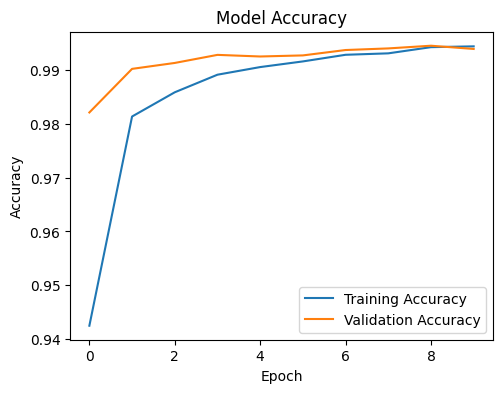

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

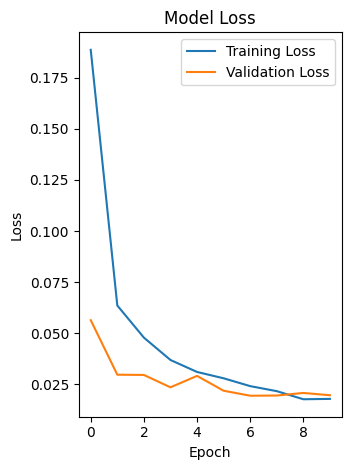

In [29]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

313/313 [==============================] - 1s 2ms/step


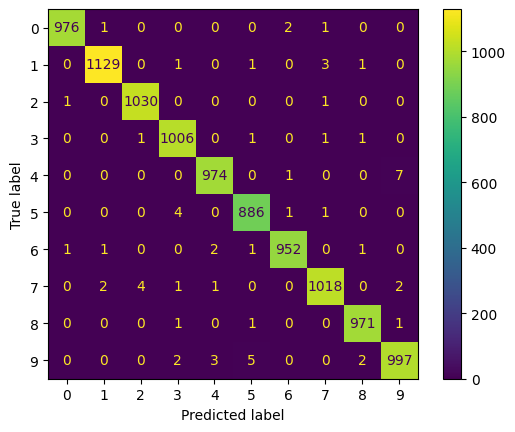

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Define class names (digits 0-9)
class_names = [str(i) for i in range(10)]

# Plot confusion matrix using ConfusionMatrixDisplay with a colorful cmap
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mtx, display_labels=class_names)
disp.plot(cmap='viridis', values_format='d')

plt.show()


1/1 [==============================] - 0s 20ms/step


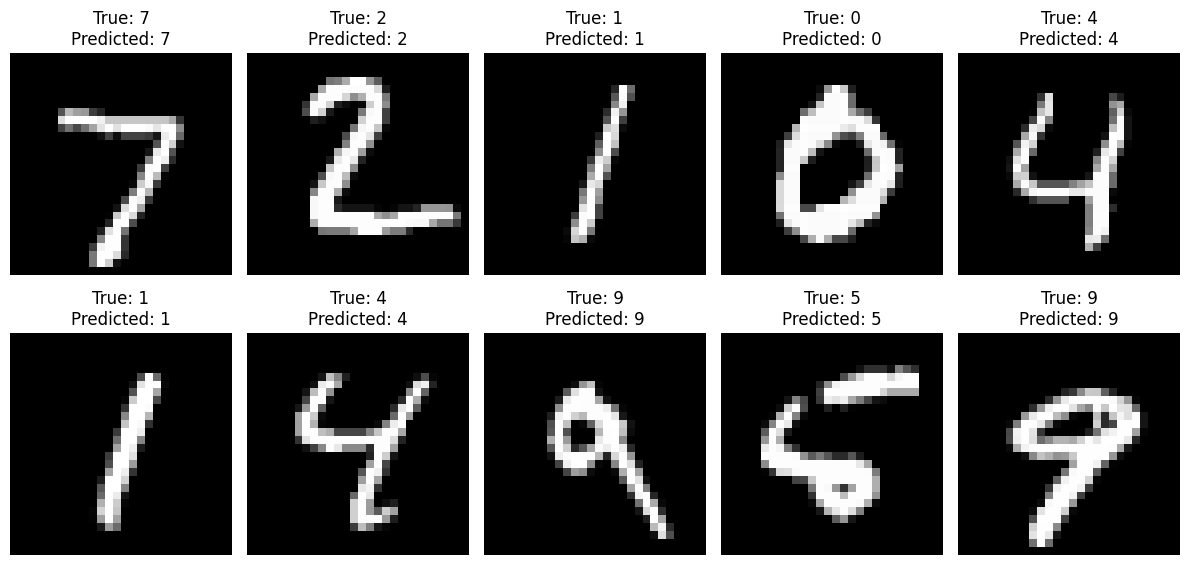

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Get the first 10 images and corresponding true labels
images_to_plot = X_test[:10]
true_labels = np.argmax(y_test[:10], axis=1)

# Predict the labels for the first 10 images
predicted_labels = model.predict(images_to_plot)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Define class names (digits 0-9)
class_names = [str(i) for i in range(10)]

# Create a 2x5 grid to display the images and their predictions
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images_to_plot[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {class_names[true_labels[i]]}\nPredicted: {class_names[predicted_labels[i]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
